In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import networkx as nx


In [33]:
# Adjust the path if needed
file_path = "/Users/selmadoganata/classes/senior_design/hemovita/cleaned_data/Hemovita_Micronutrients.xlsx"
df_dict = pd.read_excel(file_path, sheet_name=None)

# Select relevant sheets
b12 = df_dict['vitamin_B12']
anemia = df_dict['iron_deficiency_anemia']
hb = df_dict['Hemoglobin']
folate_plasma= df_dict['folate_plasma']
folate_rbc= df_dict['folate_rbc']
hcy = df_dict['homocysteine']


Bar Plot - Median Vitamin B12 by Country

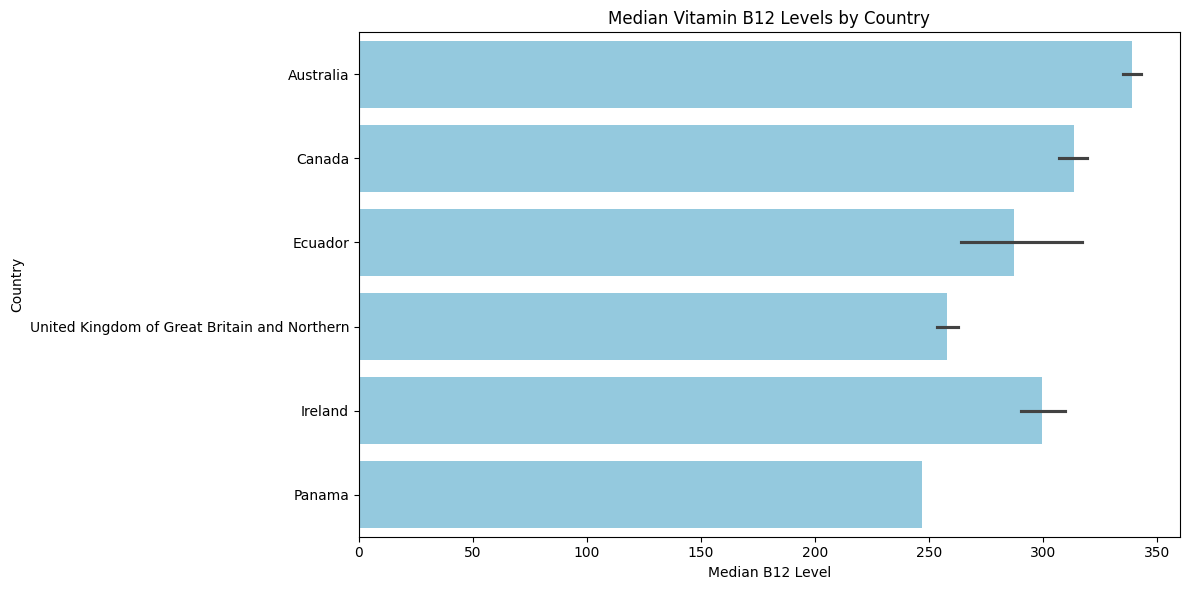

In [15]:
plt.figure(figsize=(12, 6))
sns.barplot(data=b12.dropna(subset=['Median']), x='Median', y='Country', color='skyblue')
plt.title("Median Vitamin B12 Levels by Country")
plt.xlabel("Median B12 Level")
plt.ylabel("Country")
plt.tight_layout()
plt.show()


In [8]:
print(anemia.columns.tolist())


['Indicator.', 'Country', 'Date', 'Population', 'Gender', 'Age from', 'Sample size', 'IDA cut-off', 'IDA Prevalence']


Boxplot - Hemoglobin by Population Group

In [23]:
print(hb.columns)


Index(['Indicator.', 'Country', 'Date', 'Population', 'Gender', 'Age from',
       'Sample size', 'IDA cut-off', 'IDA Prevalence'],
      dtype='object')


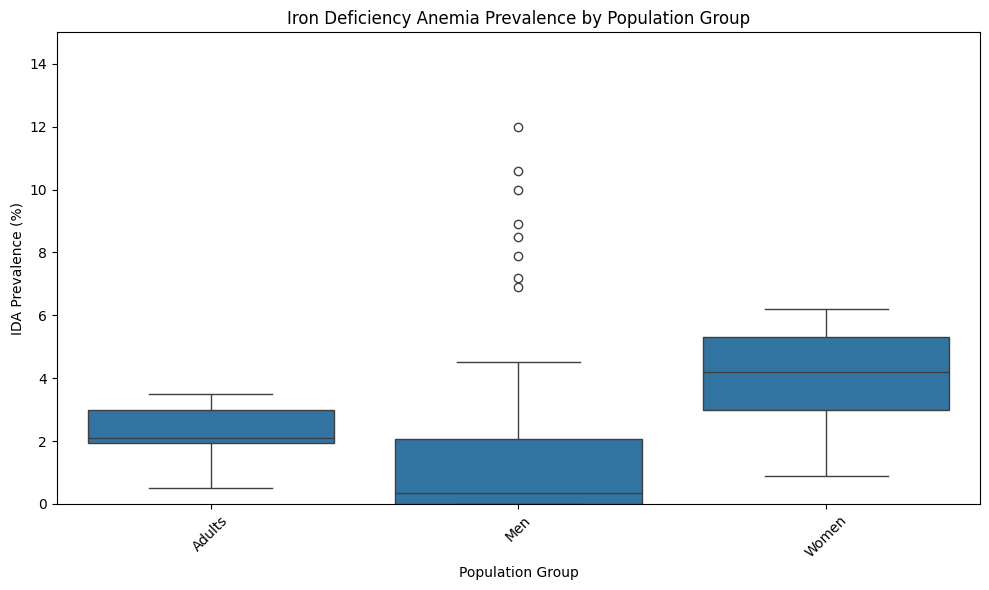

In [25]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=anemia_clean, x='Population', y='IDA Prevalence')
plt.title("Iron Deficiency Anemia Prevalence by Population Group")
plt.xlabel("Population Group")
plt.ylabel("IDA Prevalence (%)")
plt.xticks(rotation=45)
plt.ylim(0, 15)  # Adjust this as needed
plt.tight_layout()
plt.show()


Scatter Plot - Homocysteine vs Folate

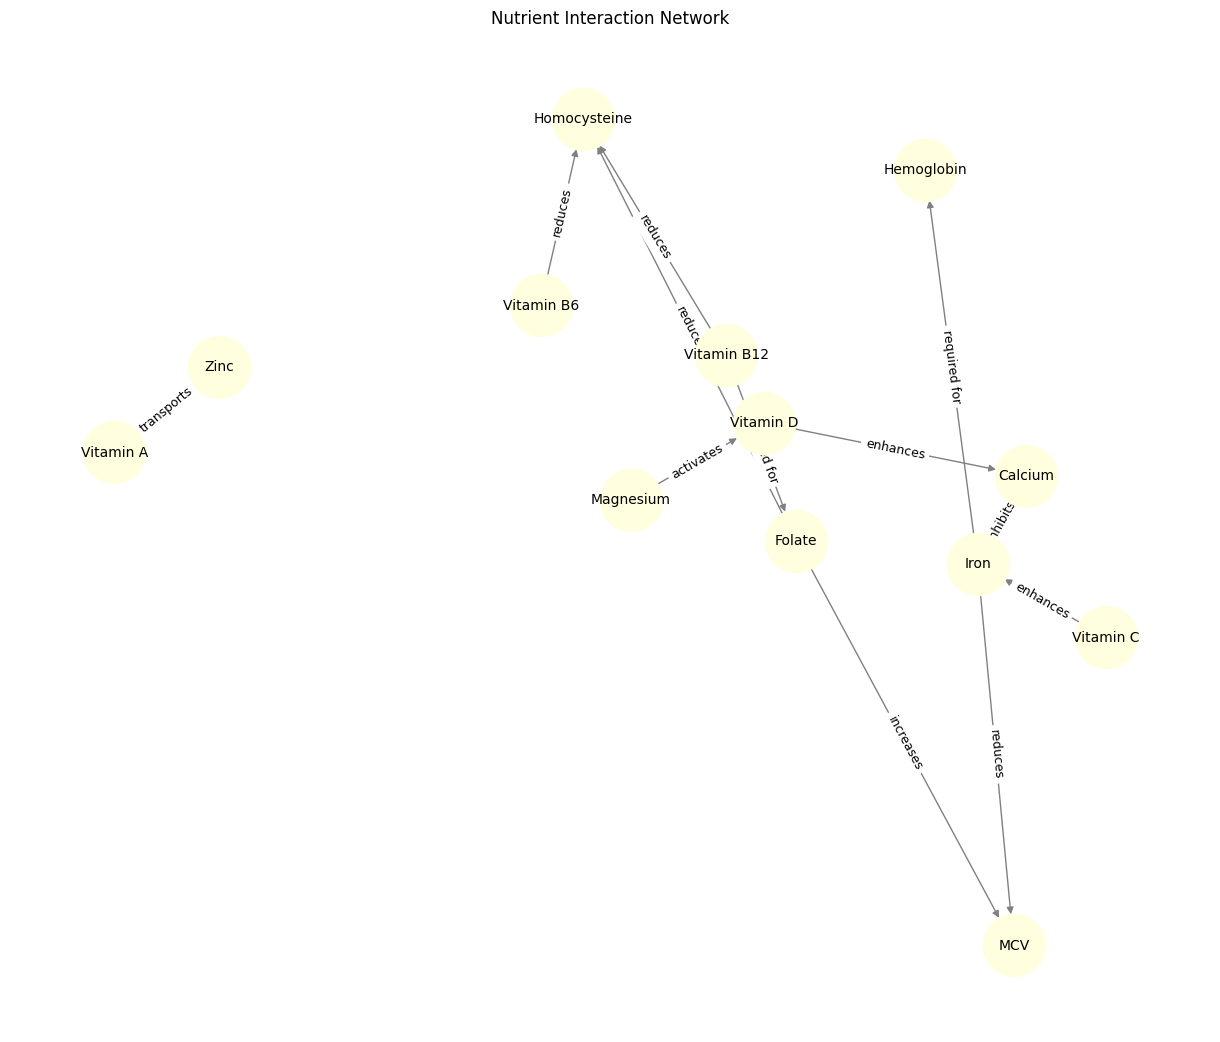

In [40]:
# If already in memory:
df_net = pd.DataFrame({
    "Source": ["Vitamin C", "Vitamin D", "Calcium", "Vitamin B12", "Folate", "Vitamin B12", "Vitamin B6", "Magnesium", "Zinc", "Iron", "Iron", "Folate"],
    "Target": ["Iron", "Calcium", "Iron", "Folate", "Homocysteine", "Homocysteine", "Homocysteine", "Vitamin D", "Vitamin A", "Hemoglobin", "MCV", "MCV"],
    "Effect": ["enhances", "enhances", "inhibits", "required for", "reduces", "reduces", "reduces", "activates", "transports", "required for", "reduces", "increases"]
})

G = nx.from_pandas_edgelist(df_net, source="Source", target="Target", edge_attr="Effect", create_using=nx.DiGraph())

plt.figure(figsize=(12, 10))
pos = nx.spring_layout(G, k=0.5)
nx.draw(G, pos, with_labels=True, node_size=2000, node_color="lightyellow", arrows=True, edge_color="gray", font_size=10)
edge_labels = nx.get_edge_attributes(G, 'Effect')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='black', font_size=9)
plt.title("Nutrient Interaction Network")
plt.axis('off')
plt.show()


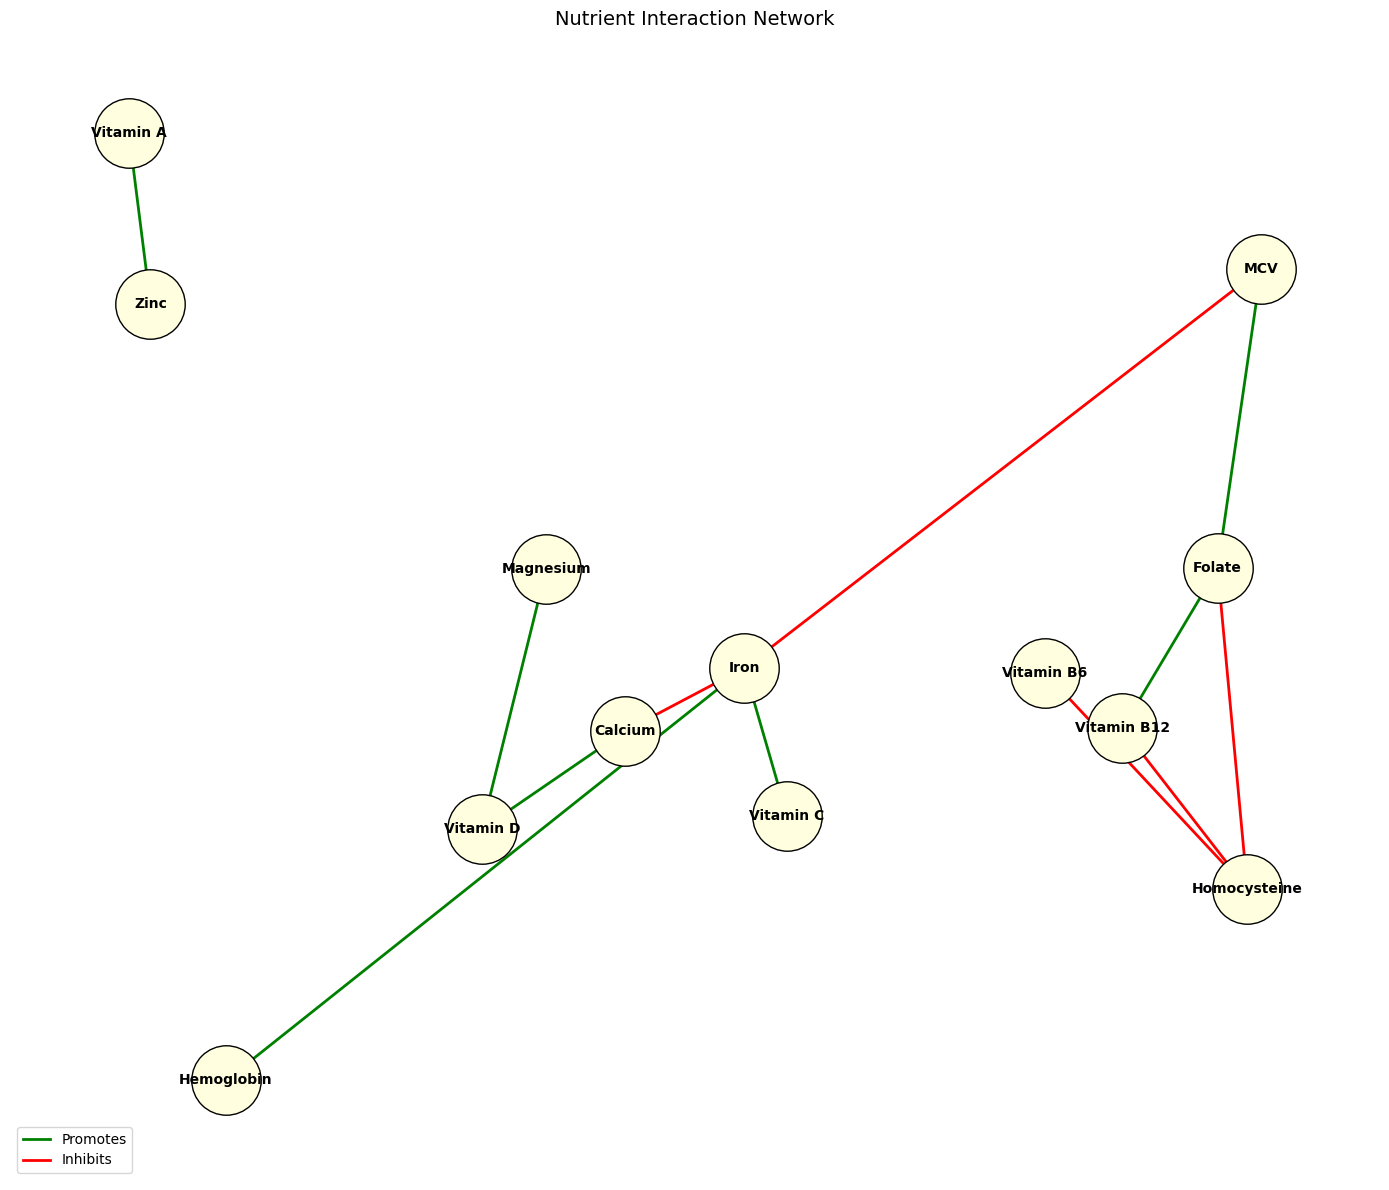

In [94]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Define your interaction network
df_net = pd.DataFrame({
    "Source": ["Vitamin C", "Vitamin D", "Calcium", "Vitamin B12", "Folate", "Vitamin B12", "Vitamin B6", "Magnesium", "Zinc", "Iron", "Iron", "Folate"],
    "Target": ["Iron", "Calcium", "Iron", "Folate", "Homocysteine", "Homocysteine", "Homocysteine", "Vitamin D", "Vitamin A", "Hemoglobin", "MCV", "MCV"],
    "Effect": ["enhances", "enhances", "inhibits", "required for", "reduces", "reduces", "reduces", "activates", "transports", "required for", "reduces", "increases"]
})

# Classify edges as promoting or inhibiting
positive_effects = {"enhances", "activates", "required for", "increases", "transports"}
negative_effects = {"inhibits", "reduces"}

# Assign colors based on effect
df_net["Color"] = df_net["Effect"].apply(lambda x: "green" if x in positive_effects else "red")

# Create the directed graph
G = nx.from_pandas_edgelist(df_net, source="Source", target="Target", edge_attr=["Effect", "Color"], create_using=nx.DiGraph())

# Layout for better node separation
pos = nx.spring_layout(G, k=0.9, iterations=100)

# Draw nodes and labels
plt.figure(figsize=(14, 12))
nx.draw_networkx_nodes(G, pos, node_color="lightyellow", node_size=2500, edgecolors='black')
nx.draw_networkx_labels(G, pos, font_size=10, font_weight='bold')

# Draw edges with colored arrows
edge_colors = [G[u][v]['Color'] for u, v in G.edges()]
nx.draw_networkx_edges(G, pos, edge_color=edge_colors, arrows=True, arrowstyle='-|>', width=2)

# Add legend for edge effects
from matplotlib.lines import Line2D
legend_elements = [
    Line2D([0], [0], color='green', lw=2, label='Promotes'),
    Line2D([0], [0], color='red', lw=2, label='Inhibits')
]
plt.legend(handles=legend_elements, loc='lower left', frameon=True)

# Optional: Add effect labels if desired
# edge_labels = nx.get_edge_attributes(G, 'Effect')
# nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=9)

plt.title("Nutrient Interaction Network", fontsize=14)
plt.axis('off')
plt.tight_layout()
plt.show()


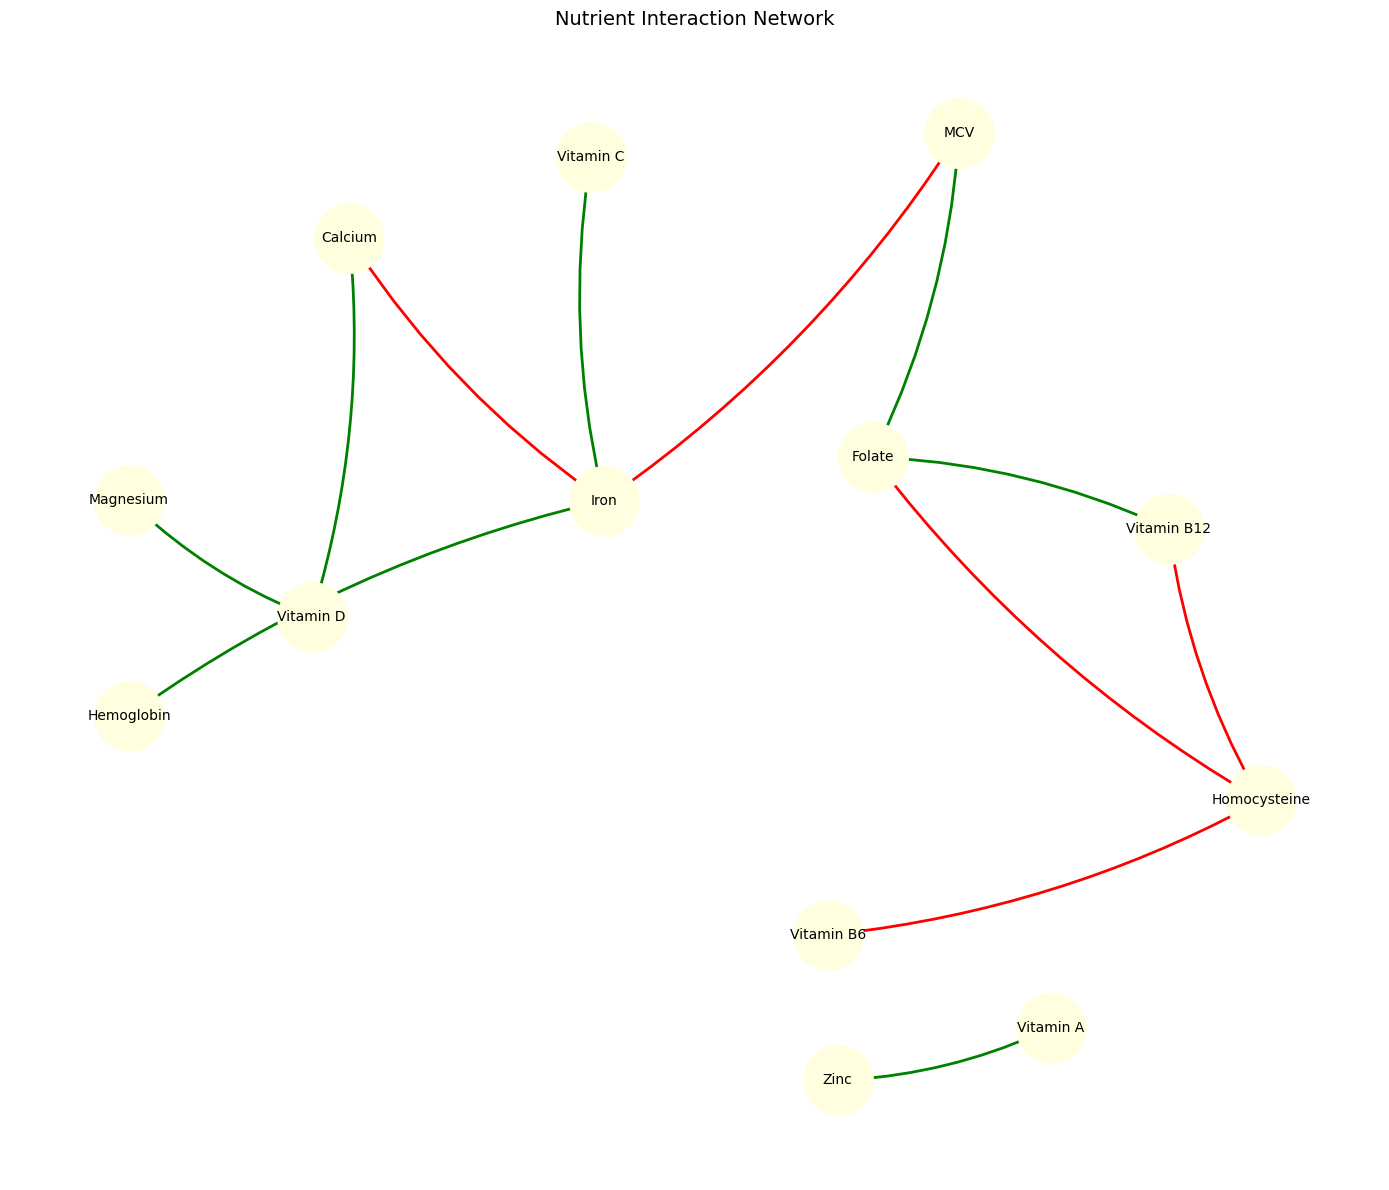

In [95]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

# Define relationships
df_net = pd.DataFrame({
    "Source": ["Vitamin C", "Vitamin D", "Calcium", "Vitamin B12", "Folate", "Vitamin B12", "Vitamin B6", "Magnesium", "Zinc", "Iron", "Iron", "Folate"],
    "Target": ["Iron", "Calcium", "Iron", "Folate", "Homocysteine", "Homocysteine", "Homocysteine", "Vitamin D", "Vitamin A", "Hemoglobin", "MCV", "MCV"],
    "Effect": ["enhances", "enhances", "inhibits", "required for", "reduces", "reduces", "reduces", "activates", "transports", "required for", "reduces", "increases"]
})

# Map effect to color
def effect_color(effect):
    if effect in ['inhibits', 'reduces']:
        return 'red'
    else:
        return 'green'

df_net['Color'] = df_net['Effect'].apply(effect_color)

# Create directed graph
G = nx.from_pandas_edgelist(df_net, source="Source", target="Target", edge_attr=["Effect", "Color"], create_using=nx.DiGraph())

# Layout
plt.figure(figsize=(14, 12))
pos = nx.spring_layout(G, k=0.9, seed=42)

# Draw nodes
nx.draw_networkx_nodes(G, pos, node_color="lightyellow", node_size=2500)

# Draw labels
nx.draw_networkx_labels(G, pos, font_size=10)

# Draw edges with arrow style and color
edge_colors = [G[u][v]['Color'] for u, v in G.edges()]
nx.draw_networkx_edges(
    G,
    pos,
    arrowstyle='->',
    arrowsize=20,
    edge_color=edge_colors,
    connectionstyle='arc3,rad=0.1',
    width=2
)

# Optional: draw edge labels if needed
# edge_labels = nx.get_edge_attributes(G, 'Effect')
# nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='gray', font_size=8)

plt.title("Nutrient Interaction Network", fontsize=14)
plt.axis('off')
plt.tight_layout()
plt.show()


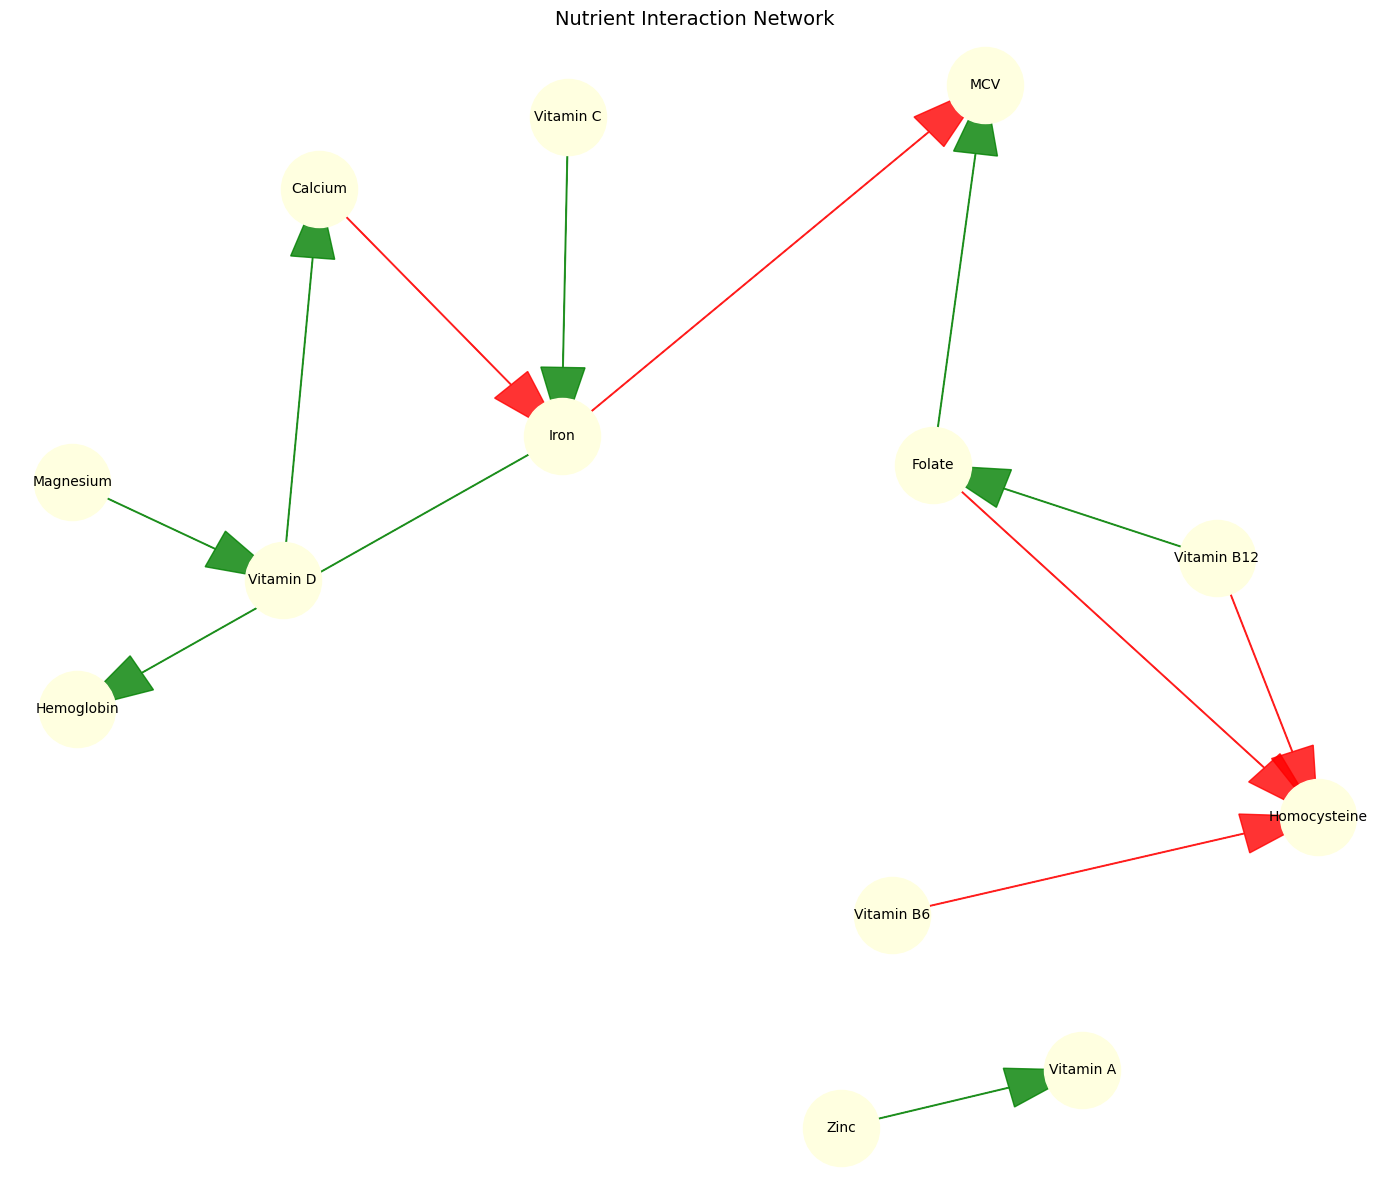

In [105]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

# Define relationships
df_net = pd.DataFrame({
    "Source": ["Vitamin C", "Vitamin D", "Calcium", "Vitamin B12", "Folate", "Vitamin B12", "Vitamin B6", "Magnesium", "Zinc", "Iron", "Iron", "Folate"],
    "Target": ["Iron", "Calcium", "Iron", "Folate", "Homocysteine", "Homocysteine", "Homocysteine", "Vitamin D", "Vitamin A", "Hemoglobin", "MCV", "MCV"],
    "Effect": ["enhances", "enhances", "inhibits", "required for", "reduces", "reduces", "reduces", "activates", "transports", "required for", "reduces", "increases"]
})

# Define color based on effect
def effect_color(effect):
    return 'red' if effect in ['inhibits', 'reduces'] else 'green'

df_net['Color'] = df_net['Effect'].apply(effect_color)

# Create directed graph
G = nx.from_pandas_edgelist(df_net, source="Source", target="Target", edge_attr=["Effect", "Color"], create_using=nx.DiGraph())

# Plot settings
plt.figure(figsize=(14, 12))
pos = nx.spring_layout(G, seed=42, k=0.8)

# Draw nodes and labels
nx.draw_networkx_nodes(G, pos, node_size=3000, node_color='lightyellow')
nx.draw_networkx_labels(G, pos, font_size=10)

# Draw edges with arrows using matplotlib patches for clarity
ax = plt.gca()
for (u, v, d) in G.edges(data=True):
    color = d['Color']
    arrow = plt.arrow(
        pos[u][0], pos[u][1],
        pos[v][0] - pos[u][0],
        pos[v][1] - pos[u][1],
        length_includes_head=True,
        head_width=0.07,
        head_length=0.12,
        fc=color,
        ec=color,
        alpha=0.8
    )

plt.title("Nutrient Interaction Network", fontsize=14)
plt.axis('off')
plt.tight_layout()
plt.show()


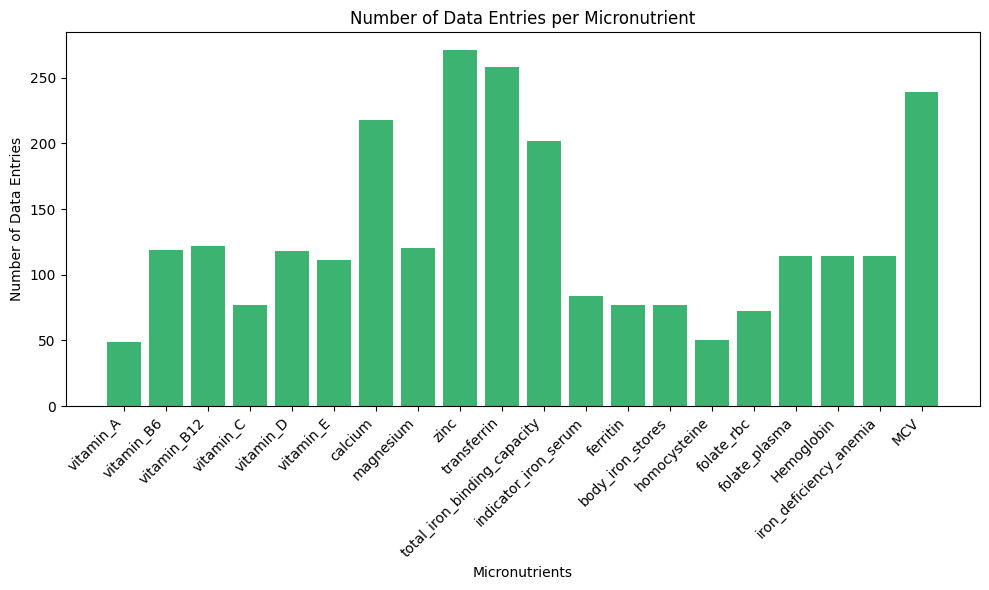

In [76]:
# Load all sheet names and their data
xlsx = pd.ExcelFile("/Users/selmadoganata/classes/senior_design/hemovita/cleaned_data/Hemovita_Micronutrients.xlsx")
sheet_data = {sheet: xlsx.parse(sheet) for sheet in xlsx.sheet_names}

# Count number of rows per sheet (excluding headers)
sheet_row_counts = {sheet: len(df) for sheet, df in sheet_data.items()}

# Plot as bar chart
plt.figure(figsize=(10, 6))
plt.bar(sheet_row_counts.keys(), sheet_row_counts.values(), color='mediumseagreen')
plt.title("Number of Data Entries per Micronutrient")
plt.xlabel("Micronutrients")
plt.ylabel("Number of Data Entries")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

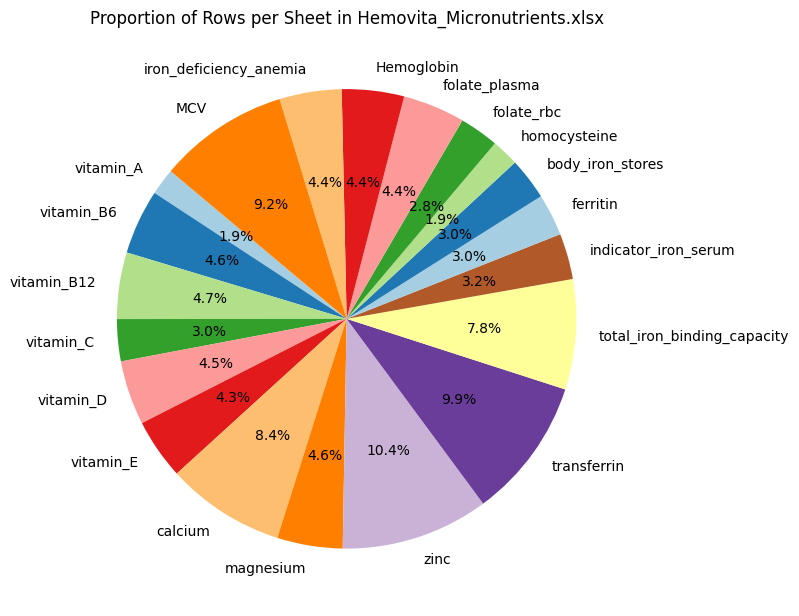

In [60]:
sheet_data = {sheet: xlsx.parse(sheet) for sheet in xlsx.sheet_names}

# Count number of rows per sheet (excluding headers)
sheet_row_counts = {sheet: len(df) for sheet, df in sheet_data.items()}

# Plot as pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    sheet_row_counts.values(),
    labels=sheet_row_counts.keys(),
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.Paired.colors
)
plt.title("Proportion of Rows per Sheet in Hemovita_Micronutrients.xlsx")
plt.tight_layout()
plt.show()

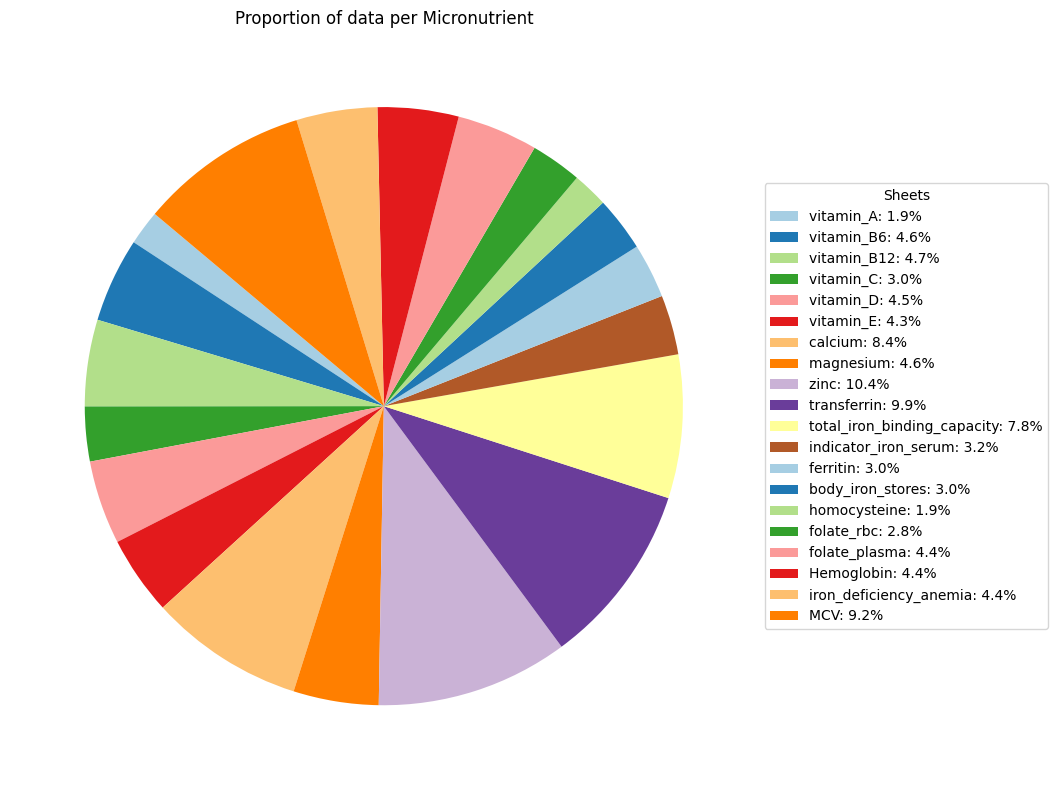

In [63]:
sheet_data = {sheet: xlsx.parse(sheet) for sheet in xlsx.sheet_names}

# Count rows per sheet
sheet_row_counts = {sheet: len(df) for sheet, df in sheet_data.items()}

# Data for plot
labels = list(sheet_row_counts.keys())
sizes = list(sheet_row_counts.values())
total = sum(sizes)

# Make pie chart without labels
fig, ax = plt.subplots(figsize=(10, 8))
wedges, texts = ax.pie(
    sizes,
    startangle=140,
    colors=plt.cm.Paired.colors
)

# Create a legend with sheet name + percentage
legend_labels = [
    f"{label}: {count/total:.1%}" for label, count in zip(labels, sizes)
]
ax.legend(wedges, legend_labels, title="Sheets", loc="center left", bbox_to_anchor=(1, 0.5))

plt.title("Proportion of data per Micronutrient")
plt.tight_layout()
plt.show()

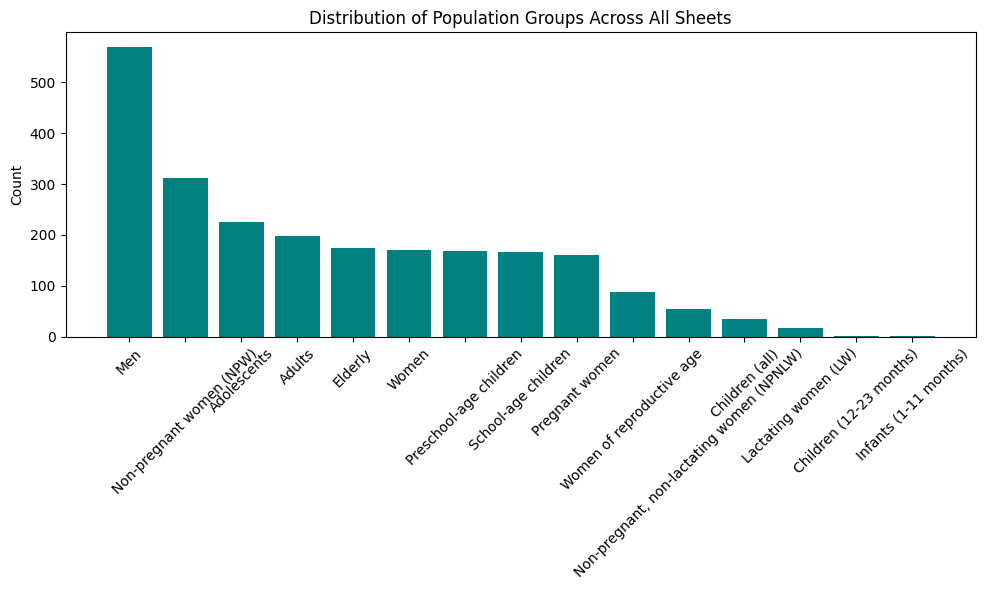

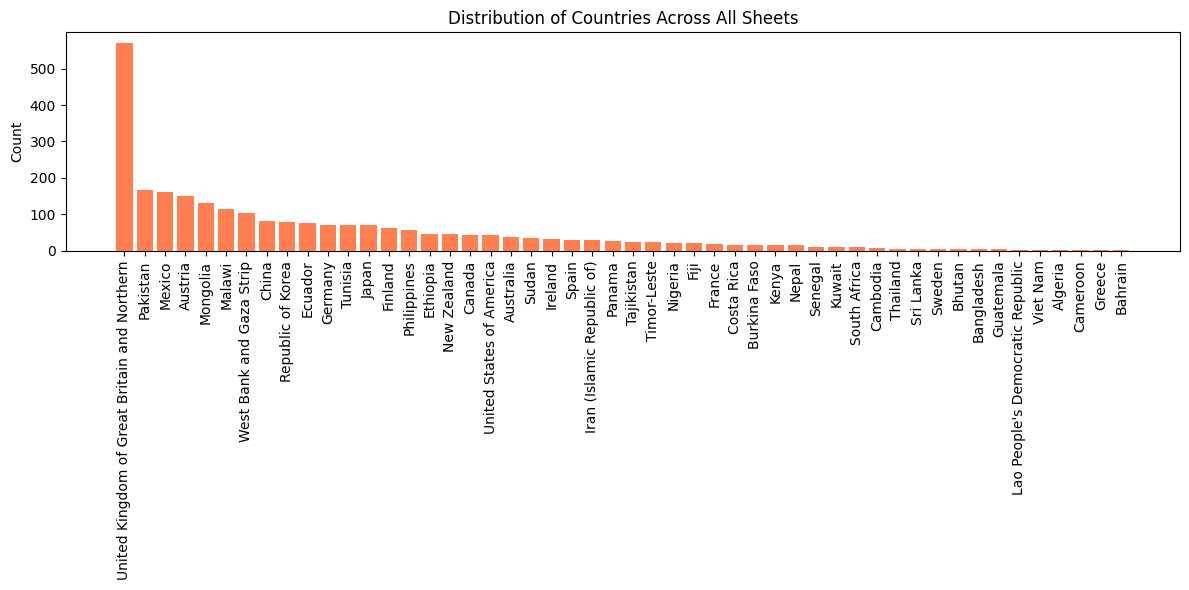

In [65]:

# Initialize counters
population_counter = Counter()
country_counter = Counter()

# Loop through each sheet
for sheet, df in sheet_data.items():
    if 'Population' in df.columns:
        population_counter.update(df['Population'].dropna().astype(str))
    if 'Country' in df.columns:
        country_counter.update(df['Country'].dropna().astype(str))

# ---------- Population Chart ----------
plt.figure(figsize=(10, 6))
pop_labels, pop_values = zip(*population_counter.most_common())
plt.bar(pop_labels, pop_values, color='teal')
plt.title("Distribution of Population Groups Across All Sheets")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# ---------- Country Chart ----------
plt.figure(figsize=(12, 6))
country_labels, country_values = zip(*country_counter.most_common())
plt.bar(country_labels, country_values, color='coral')
plt.title("Distribution of Countries Across All Sheets")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


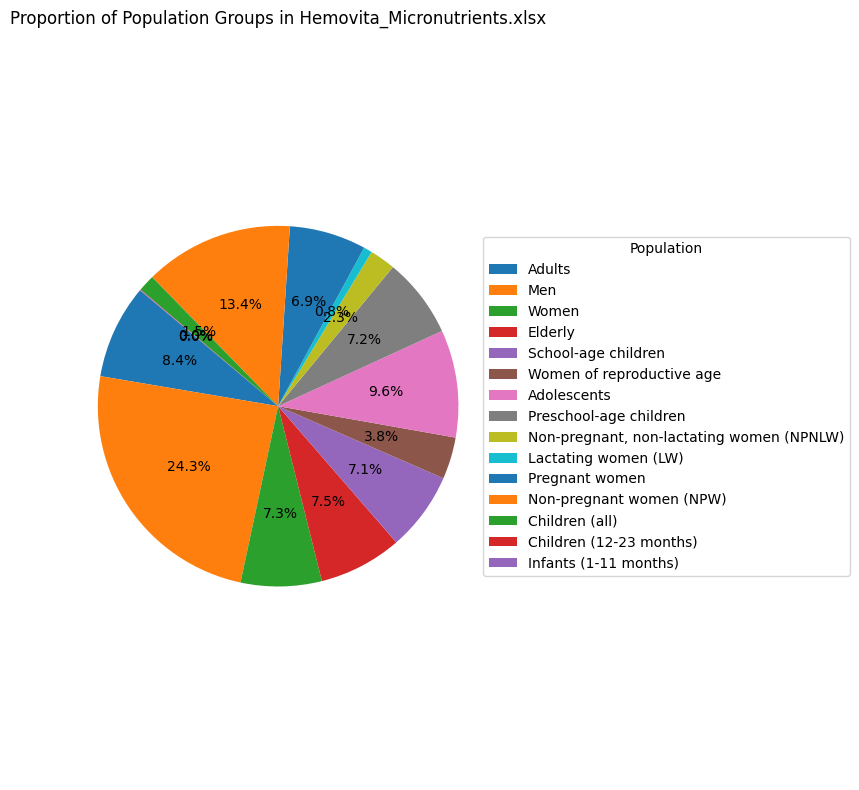

In [70]:
sheet_data = {sheet: xlsx.parse(sheet) for sheet in xlsx.sheet_names}

# Count population groups
population_counter = Counter()
for df in sheet_data.values():
    if 'Population' in df.columns:
        population_counter.update(df['Population'].dropna().astype(str))

# Prepare data for pie chart
labels = list(population_counter.keys())
sizes = list(population_counter.values())

# Plot
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=None, autopct='%1.1f%%', startangle=140)
plt.title("Proportion of Population Groups in Hemovita_Micronutrients.xlsx")
plt.axis('equal')  # Equal aspect ratio ensures pie is drawn as a circle.
plt.legend(labels, title="Population", loc="center left", bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()

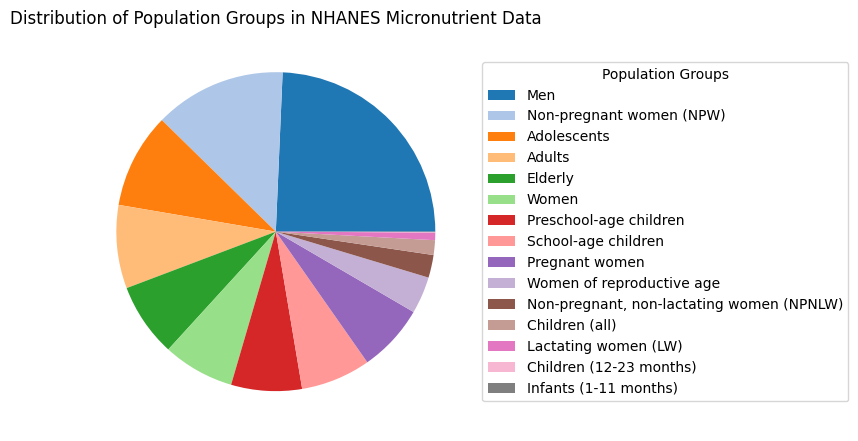

In [75]:
# Load the Excel file
excel_path = "/Users/selmadoganata/classes/senior_design/hemovita/cleaned_data/Hemovita_Micronutrients.xlsx"
xls = pd.ExcelFile(excel_path)

# Initialize empty list to collect population data
population_data = []

# Loop through all sheets and collect 'Population' column where it exists
for sheet in xls.sheet_names:
    df = xls.parse(sheet)
    if 'Population' in df.columns:
        population_data.extend(df['Population'].dropna().tolist())

# Create a DataFrame to count population group occurrences
population_df = pd.DataFrame(population_data, columns=['Population'])
population_counts = population_df['Population'].value_counts()

# Plot as pie chart with legend
plt.figure(figsize=(8, 8))
colors = plt.cm.tab20.colors  # distinct color palette
patches, _ = plt.pie(population_counts, colors=colors, labels=None)

# Add legend
plt.legend(patches, population_counts.index, title="Population Groups", loc="center left", bbox_to_anchor=(1, 0.5))
plt.title("Distribution of Population Groups in NHANES Micronutrient Data")
plt.tight_layout()
plt.show()

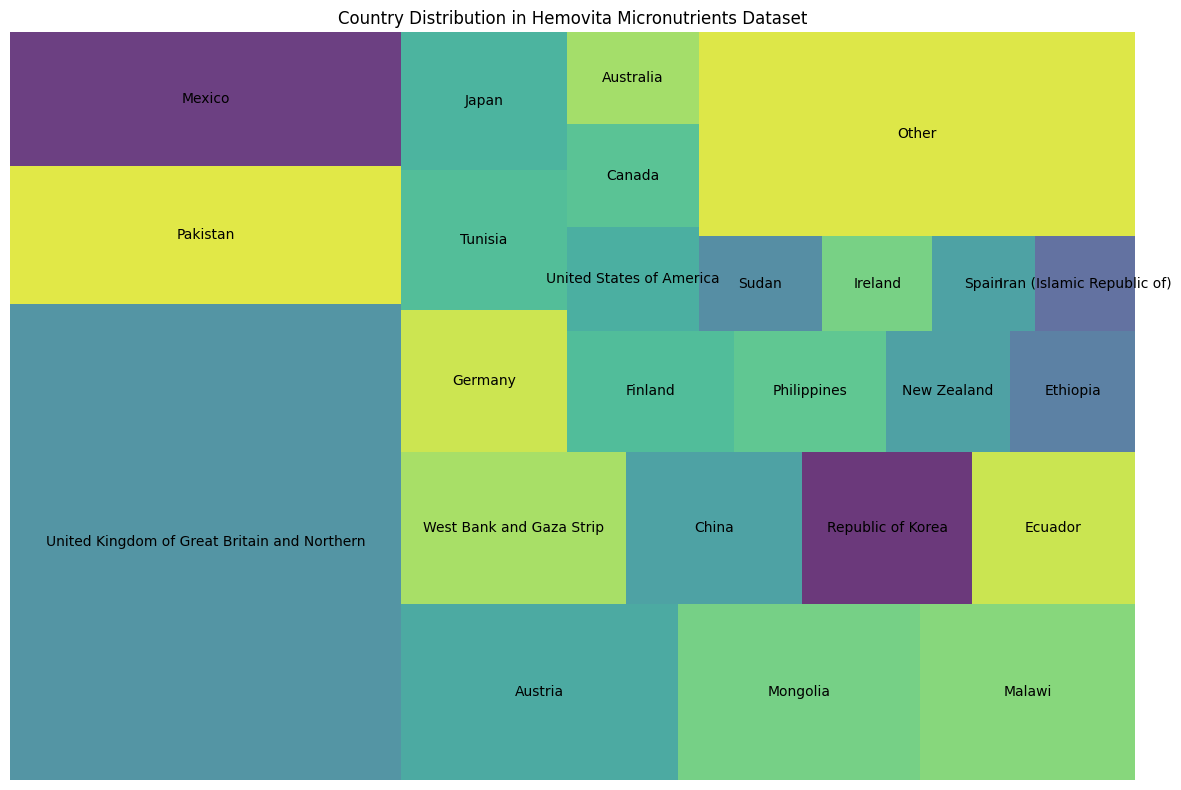

In [87]:
import squarify  # pip install squarify
import matplotlib.pyplot as plt

# Gather all 'Country' entries
country_data = []
for sheet in xls.sheet_names:
    df = xls.parse(sheet)
    if 'Country' in df.columns:
        country_data.extend(df['Country'].dropna().tolist())

# Count occurrences
country_counts = pd.Series(country_data).value_counts()

# Optional: group small counts under "Other"
top_n = 24
top = country_counts[:top_n]
other = pd.Series({'Other': country_counts[top_n:].sum()})
display_counts = pd.concat([top, other])

# Plot treemap
plt.figure(figsize=(12, 8))
squarify.plot(sizes=display_counts.values, label=display_counts.index, alpha=0.8)
plt.title("Country Distribution in Hemovita Micronutrients Dataset")
plt.axis('off')
plt.tight_layout()
plt.show()

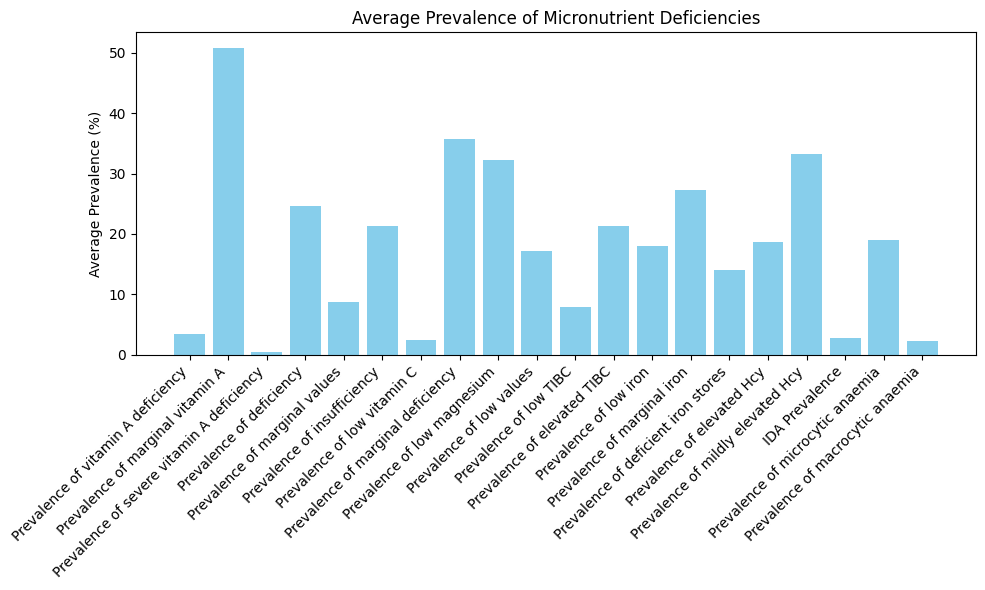

In [88]:
# Dictionary to store sum and count of values for each prevalence column
prevalence_data = {}

# Loop through each sheet
for sheet in xls.sheet_names:
    df = xls.parse(sheet)
    for col in df.columns:
        if "Prevalence" in col:
            # Initialize tracking if first time
            if col not in prevalence_data:
                prevalence_data[col] = {'sum': 0, 'count': 0}
            # Accumulate sum and count
            valid_values = pd.to_numeric(df[col], errors='coerce').dropna()
            prevalence_data[col]['sum'] += valid_values.sum()
            prevalence_data[col]['count'] += valid_values.count()

# Compute average prevalence
average_prevalence = {k: v['sum'] / v['count'] for k, v in prevalence_data.items() if v['count'] > 0}

# Plot
plt.figure(figsize=(10, 6))
plt.bar(average_prevalence.keys(), average_prevalence.values(), color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.ylabel("Average Prevalence (%)")
plt.title("Average Prevalence of Micronutrient Deficiencies")
plt.tight_layout()
plt.show()

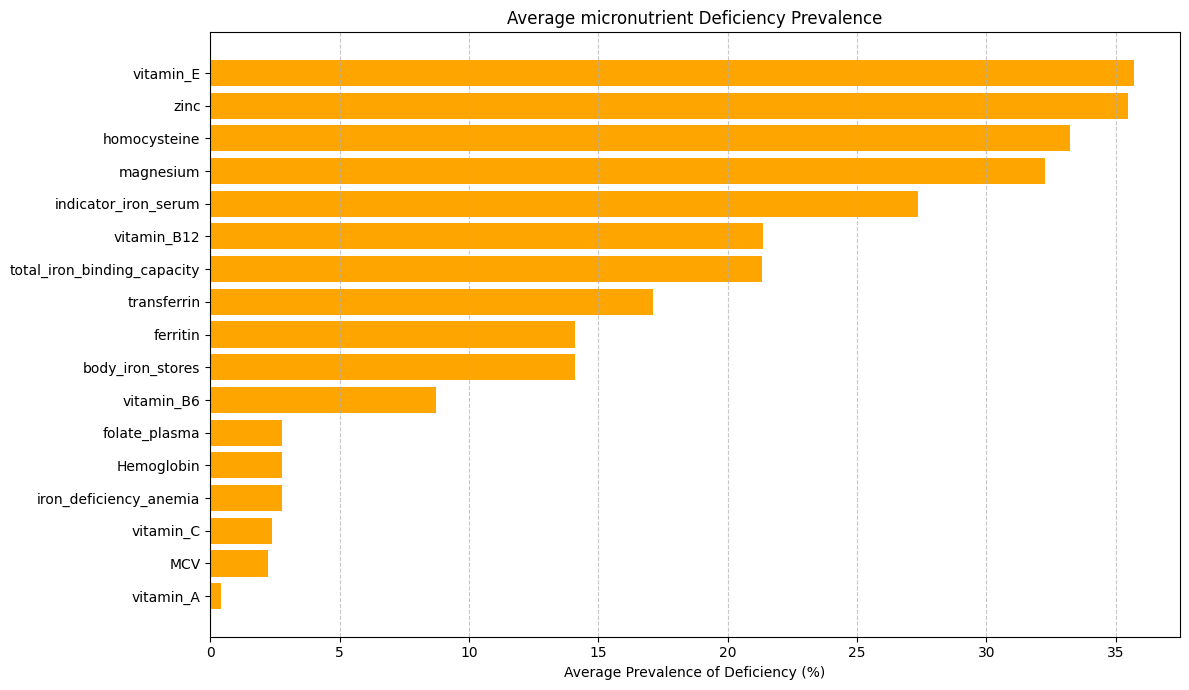

In [91]:
prevalence_data = {}

for sheet in xls.sheet_names:
    df = xls.parse(sheet)
    
    # Try to find any column with 'Prevalence' in its name
    prevalence_cols = [col for col in df.columns if 'Prevalence' in col]
    
    # Only proceed if such a column exists
    if prevalence_cols:
        for col in prevalence_cols:
            values = pd.to_numeric(df[col], errors='coerce').dropna()
            if not values.empty:
                prevalence_data[sheet] = values.mean()

# Sort by average prevalence
sorted_prevalence = dict(sorted(prevalence_data.items(), key=lambda item: item[1], reverse=True))

# Plot
plt.figure(figsize=(12, 7))
plt.barh(list(sorted_prevalence.keys()), list(sorted_prevalence.values()), color='orange')
plt.xlabel("Average Prevalence of Deficiency (%)")
plt.title("Average micronutrient Deficiency Prevalence")
plt.gca().invert_yaxis()  # Highest prevalence on top
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

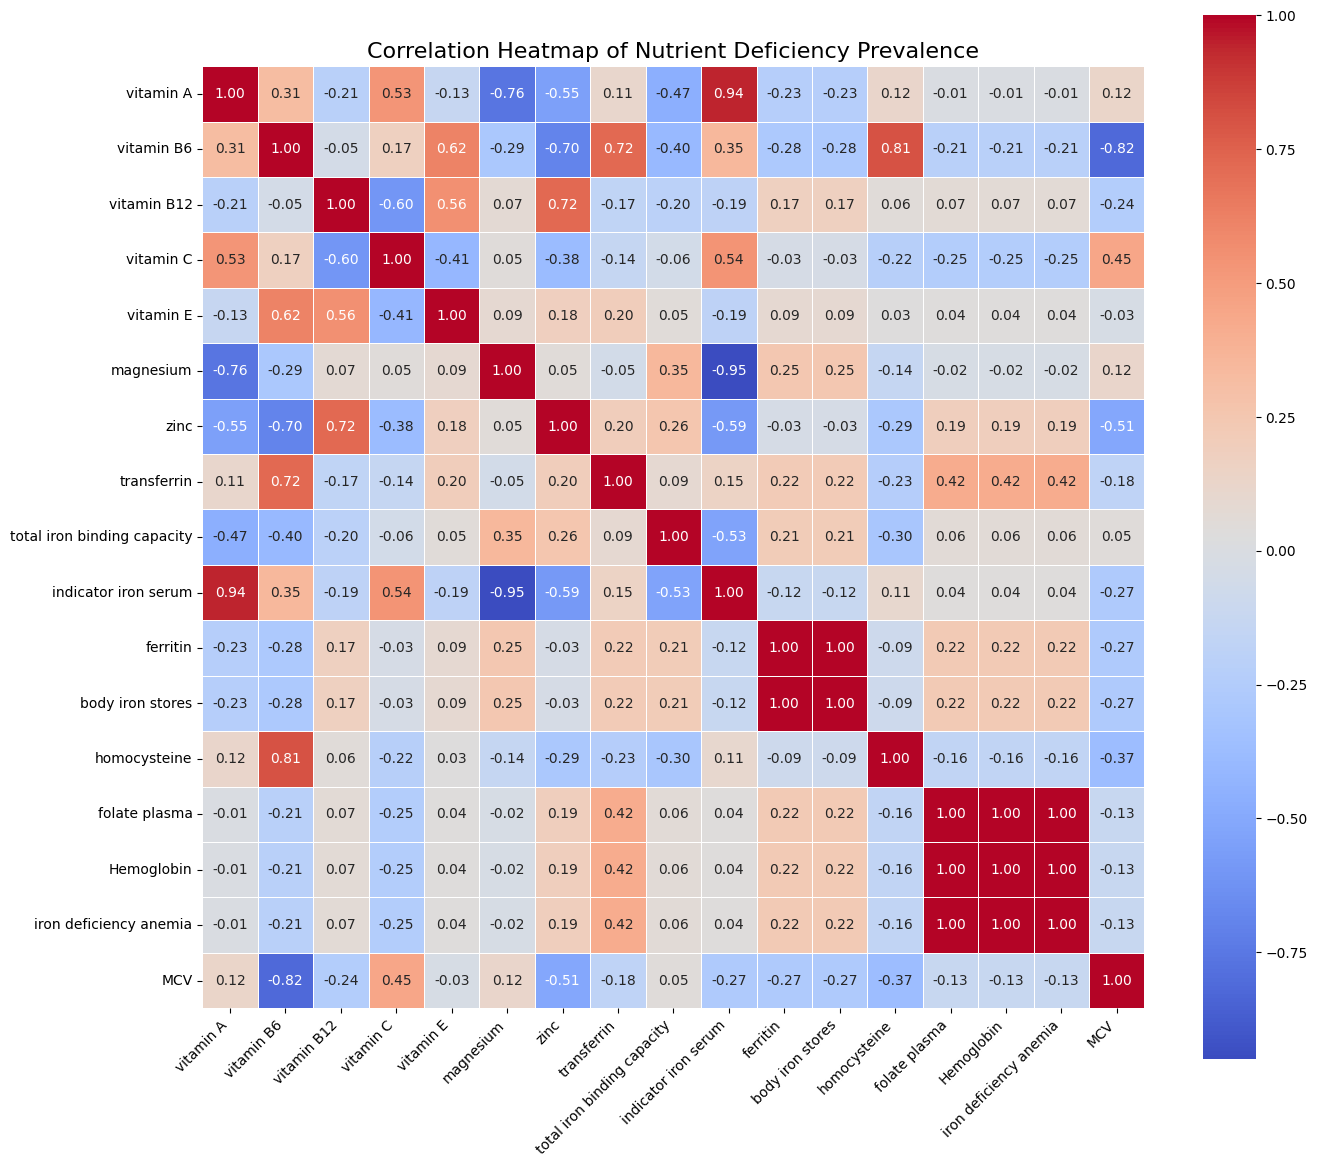

In [93]:
# Initialize empty DataFrame to merge all prevalence columns
prevalence_df = pd.DataFrame()

# Loop through each sheet
for sheet in xls.sheet_names:
    df = xls.parse(sheet)
    
    # Identify prevalence columns (containing 'Prevalence' in the name)
    prevalence_cols = [col for col in df.columns if 'Prevalence' in col]
    
    if prevalence_cols:
        for col in prevalence_cols:
            values = pd.to_numeric(df[col], errors='coerce').dropna().reset_index(drop=True)
            if not values.empty:
                # Shorten long sheet names for display
                col_name = sheet.strip().replace("_", " ")
                prevalence_df[col_name] = values

# Drop columns with too few data points to correlate
prevalence_df = prevalence_df.dropna(axis=1, thresh=5)

# Compute correlation matrix
correlation_matrix = prevalence_df.corr()

# Plot heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=0.5)
plt.title("Correlation Heatmap of Nutrient Deficiency Prevalence", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()